In [1]:
import numpy as np

from optims.cso_optim import CSO_optim
from optims.pso_optim import PSO_optim
from optims.ppso_optim import PPSO_optim
from optims.ppso_optim_improved1 import PPSO_optim1, PPSO_optim2, PPSO_optim3, PPSO_optim1_1
from optims.ppso_optim_improved2 import PPSO_optim4, PPSO_optim5
from optims.ppcso_optim import PPCSO_optim
from utils.tools import Tools
from optim_test_fun import OptimFunTest

# 进行图像匹配的操作
config = Tools.load_yaml_config("configs/optim_test_config.yaml")
res_path = f"{config.data_save_path}/{config.record_id}"
file_name = f"{config.record_id}_config.yaml"
Tools.save_obj_yaml(res_path, file_name, config)
config.max_fes = config.solution_dimension * 10000

run_times = config.run_times

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 设置随机种子
# print(np.random.uniform(-1, 20, 2))

# 运行测试函数
test_fun_framework = OptimFunTest(config)
optim_classes = [PPCSO_optim, PPSO_optim4, PPSO_optim5, PSO_optim, PPSO_optim, PPSO_optim1, PPSO_optim1_1, PPSO_optim2, PPSO_optim3, CSO_optim]
# optim_classes = []
# test_fun_framework.test_all_optims_funs(optim_classes)

# 下面这个函数可以交给test_fun_framework来处理
# test_fun_framework.test_optim_funs(PPSO_optim5)
# test_fun_framework.test_single_optim_fun(PPSO_optim5, 3)

# test_fun_framework.test_all_optims_multi_process(optim_classes)


# for i in range(run_times):
#     rand_seed = config.rand_seed + i
#     # 每一次迭代随机种子+1，这样的方式保证结果的一致
#     np.random.seed(rand_seed)
#     optim = PPSO_optim(config)
#     optim.set_runid(i)
#     test_fun_framework.set_fitness_obj(optim)
#     optim.run_std_optim()

In [3]:
method_names = [PSO_optim.__name__, PPSO_optim.__name__]
data_dict = test_fun_framework.read_optims_fitness_FEs(method_names)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 绘制图像，读取多条数据，然后取中位数

# method_names = [PSO_optim.__name__, PPSO_optim.__name__]
method_names = []

for optim_clas in optim_classes:
    method_names.append(optim_clas.__name__)

data_dict = test_fun_framework.read_optims_fitness_FEs(method_names)


PPCSO_optim, 2, mean: 9.7342e+05, std: 3.7755e+05
PPCSO_optim, 3, mean: 1.6549e+08, std: 2.0039e+08
PPCSO_optim, 7, mean: 1.7280e+01, std: 8.4629e+00
PPCSO_optim, 8, mean: 2.0956e+01, std: 4.3219e-02
PPCSO_optim, 9, mean: 1.2499e+01, std: 1.7514e+00
PPSO_optim4, 2, mean: 2.2745e+05, std: 7.6862e+04
PPSO_optim4, 3, mean: 2.8914e+07, std: 3.7850e+07
PPSO_optim4, 7, mean: 1.3896e+01, std: 1.0705e+01
PPSO_optim4, 8, mean: 2.0941e+01, std: 4.7228e-02
PPSO_optim4, 9, mean: 2.6773e+01, std: 8.9964e+00
PPSO_optim5, 2, mean: 1.6330e+06, std: 6.8317e+05
PPSO_optim5, 3, mean: 3.3507e+07, std: 3.4678e+07
PPSO_optim5, 7, mean: 8.4863e+00, std: 6.4270e+00
PPSO_optim5, 8, mean: 2.0932e+01, std: 7.5333e-02
PPSO_optim5, 9, mean: 1.8613e+01, std: 5.1834e+00
PSO_optim, 2, mean: 6.7622e+07, std: 7.5216e+07
PSO_optim, 3, mean: 8.2839e+10, std: 6.1108e+10
PSO_optim, 7, mean: 2.2361e+02, std: 6.3314e+01
PSO_optim, 8, mean: 2.0934e+01, std: 6.3350e-02
PSO_optim, 9, mean: 2.8049e+01, std: 3.5840e+00
PPSO_optim

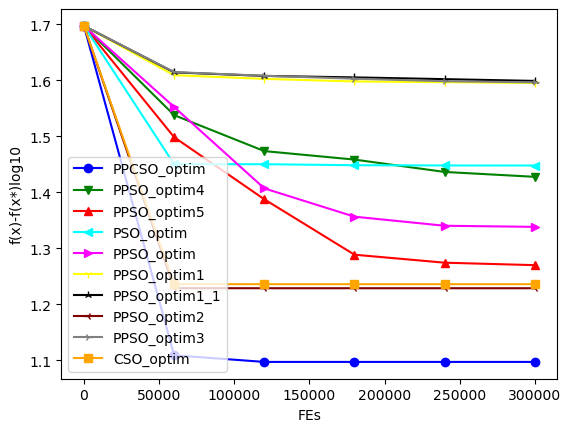

In [5]:
test_fun_framework.show_mean_convergence_line(data_dict, method_names, 9, 15)
